In [81]:
import seaborn as sns
import json
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def extend(lst, desired_length, fill_value=None):
    return lst + [fill_value] * (desired_length - len(lst))

In [92]:
# Angle between two vectors in degrees.
def vang(a, b): 
    return np.arccos(a.dot(b)) / np.pi * 180

# Vector from two angles
def vec(x):
    return np.array([np.cos(x[0]) * np.sin(x[1]), np.sin(x[0]) * np.sin(x[1]), np.cos(x[1])])

# convert in-game angles to radian coordiantes
def gamea(a, b):
    return [b / 180 * np.pi, (90 - a) / 180 * np.pi]

# pixels distance between two vectors (a,b) and (c,d) defined by in-game angles.
def points(a, b, c, d):
    # 3/4 seems to be a change in game engine?
    return vang(vec(gamea(a, b)), vec(gamea(c, d))) / 0.022 * 0.75

def vector_length(x, y):
    return np.sqrt(x * x + y * y)

def diff(a, b):
#     return sum([abs(x[0] - x[1]) for x in zip(a, b)])
#     return pow(sum(d), 0.5)
    d = [pow(x[0] - x[1], 2) for x in zip(a, b)]
    return sum([max(x - 3, 0) for x in d])

def dist_score(x):
    return np.exp(-0.0004 * np.power(x, 2))

def rc_score(r1, r2):
    return 100 * np.mean([dist_score(vector_length(r1['x'][i] - r2['x'][i], r1['y'][i] - r2['y'][i])) for i in range(len(r1['x']))])

def median_delta_recoil(rc):
    mx = [0]
    my = [0]
    x = 0
    y = 0
    n = len(rc[0]['x'])
    for i in range(1, n):
        dx = []
        dy = []
        for r in rc:
            dx.append(r['x'][i] - r['x'][i-1])
            dy.append(r['y'][i] - r['y'][i-1])
        x += np.median(dx)
        y += np.median(dy)
        mx.append(np.round(x, 1))
        my.append(np.round(y, 1))
    return mx, my

def mean_recoil(rc):
    print(magic)
    mx = [0]
    my = [0]
    x = 0
    y = 0
    n = len(rc[0]['x'])
    for i in range(1, n):
        dx = []
        dy = []
        for r in rc:
            dx.append(r['x'][i])
            dy.append(r['y'][i])
        x = np.mean(dx)
        y = np.mean(dy)
        mx.append(np.round(x * magic, 1))
        my.append(np.round(y * magic, 1))
    return mx, my

In [84]:
def rpm(name):
  with open('../client/specs.json') as f:
    specs = json.load(f)
  for x in specs:
    if x['name'] == name:
      return x['rpm']
  return 1

In [93]:
np.round(points(13.0, 37.10, -0.4, 37.36), 2)

456.9

In [87]:
rc = [
   {"weapon":"r301","barrel":0,"stock":0,"comment":"vlcsnap-2024-09-07-18h42m46s249.png 289.08","x":[0,18.7,18.7,30.4,34.9,27.5,34.9,37.5,40.7,50,62.2,76.6,77.6,65.7,44.9,38.8,18.9,-2.3,-5.5,-1,6.4,27.5,36.2,51,55.8,61.2,77.6,86.9,95.2,104.2,115.1],"y":[0,-17.7,-60.5,-84.6,-85.6,-107.7,-130.1,-139.1,-146.5,-151,-160,-157.4,-166.7,-186.3,-207.8,-213.9,-209.7,-202.3,-211,-225.7,-232.5,-231.2,-239.5,-230.5,-235.7,-226,-219,-232.8,-244,-257.5,-265.2]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"vlcsnap-2024-09-07-19h17m40s322.png 315.72","x":[0,17,20.5,34.9,29.9,35.9,36.9,44.4,57.4,71.9,88.8,91.3,88.8,70.9,57.4,49.9,39.4,27.9,22,16.5,33.2,41.4,49.4,60.9,76.8,91.3,96.8,92.6,91.8,92.3,101],"y":[0,-31.9,-72.4,-95.8,-131.7,-150.7,-164.2,-175.2,-183.6,-190.1,-181.6,-192.1,-210.1,-229.1,-247.5,-252.5,-254.5,-243,-256.5,-262.5,-275,-283.4,-294.4,-284.4,-271.5,-268.5,-280.4,-291.5,-297.9,-306.4,-305.7]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_1_291.11.png","x":[0,6.8,2.8,17.1,10.2,8.5,4,10.8,16.9,20.5,33.6,44.4,34.1,26.7,11.4,-6.8,-15.9,-21.1,-19.2,-13.1,-6.3,9.1,25,25.6,29.6,34.1,43.8,47.8,41.5,42.4,46.7],"y":[0,-17.6,-58,-82.5,-114.9,-138.3,-145.7,-162.7,-170.2,-171.3,-163.3,-173.5,-193.5,-206.5,-212.8,-213.4,-200.9,-199.7,-203.6,-218.5,-236.1,-248.1,-257.2,-245.8,-248.1,-253.8,-266.9,-270.3,-273.7,-285.6,-287.3]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_2_343.6.png","x":[0,20.1,25.2,41.3,43.6,47.6,43,47,53.3,59.1,70,79.7,69.4,63.7,55.6,40.7,28.7,23.5,20.1,31.5,38.4,44.7,46.5,59.1,75.1,76.3,81.4,84.9,88.9,86.6,94.6],"y":[0,-37.3,-65.9,-89.5,-116.4,-139.4,-157.1,-173.8,-183.5,-199,-193.8,-204.2,-214.5,-229.4,-228.2,-225.9,-234.5,-233.4,-247.2,-259.8,-271.8,-281,-291.9,-290.7,-296.5,-301.6,-301.6,-298.2,-305.7,-314.3,-330.3]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_3_336.01.png","x":[0,8.1,2.9,18.5,22.6,28.4,31.9,36.5,41.2,54.5,64.3,71.3,55.1,45.2,33.6,24.3,18.5,12.8,18,28.7,32.5,41.2,43.5,59.7,64.9,75.4,74.8,72.1,73.6,81.7,77.7],"y":[0,-30.1,-68.4,-90.4,-122.9,-146.1,-158.2,-164,-170.4,-180.8,-180.8,-193,-212.7,-229.5,-241.7,-255.6,-259.1,-267.2,-272.4,-287.7,-285.2,-284,-295.6,-286.9,-283.4,-299.1,-311.3,-314.8,-319.4,-318.8,-326.9]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_4_264.42.png","x":[0,6.3,0,12.1,11.5,14.4,10.3,16.1,27,29.9,43.1,43.1,34.5,27.6,19,-0.6,-11.5,-22.4,-23,-10.3,-3.4,2.3,14.9,27.6,33.3,49.4,53.4,57.4,53.4,58.6,65.5],"y":[0,-29.3,-59.2,-82.7,-113.2,-131,-144.7,-157.4,-161.4,-170.6,-164.3,-180.4,-199.9,-203.9,-214.8,-222.9,-216,-220.6,-231.5,-229.2,-238.4,-228.6,-223.4,-219.4,-224.6,-218.3,-221.7,-228,-239.5,-255,-256.2]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_5_347.12.png","x":[0,9.7,11.4,23.3,15.4,14.2,15.9,22.2,26.8,36.4,47.8,51.2,38.1,22.2,17.1,6.3,-1.7,-12.5,-17.1,-4,15.4,25,37.6,51.2,61.5,67.2,77.1,79,77.4,84.3,83.1],"y":[0,-34.2,-71.2,-96.2,-123,-152.6,-169.1,-181,-178.8,-196.4,-186.7,-206.7,-227.1,-247.6,-256.8,-264.7,-271.6,-278.4,-297.7,-308,-318.2,-308,-318.2,-325.1,-316,-314.3,-319.9,-323.3,-326.8,-332.5,-337]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_7_306.2.png","x":[0,13.7,11.8,30.1,31.4,35.1,31,31.4,28.2,42.4,50.1,58.3,42.4,22.3,11.8,-5.9,-15.9,-17.3,-24.1,-15,-7.7,11.4,26.4,41.4,44.6,50.1,50.1,52.4,50.1,59.2,60.6],"y":[0,-26,-65.6,-91.1,-116.6,-137.1,-151.7,-154.9,-156.2,-166.7,-159,-166.7,-184,-194.9,-210,-210,-215.4,-222.7,-234.6,-240,-256.9,-263.3,-267.8,-276.9,-277.4,-262.8,-271.9,-276.9,-295.1,-294.2,-300.1]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_8_296.49.png","x":[0,9.5,10.9,28.2,28.6,35.9,31.8,33.6,46.4,57.2,71.4,70.5,63,46.8,29.1,9.5,-5.5,-12.3,-14.1,-16.8,-1.8,15.5,29.1,40.5,59.1,69.5,76.8,72.6,78.4,74.1,76.8],"y":[0,-18.6,-46.4,-73.6,-109.1,-133.2,-144.5,-152.7,-159.1,-162.3,-161.4,-173.6,-187.4,-193.2,-208.6,-202.7,-194.1,-185.5,-206.8,-211.4,-222.3,-228.6,-228.2,-218.2,-225.5,-223.2,-238.6,-253.7,-265.3,-280.9,-286.4]},
   {"weapon":"r301","barrel":0,"stock":0,"comment":"r301_9_252.33.png","x":[0,15,9.6,21.4,13.7,19.2,22.3,20.1,31,44.7,63.4,66.6,55.2,44.2,26.9,14.1,-5,-22.2,-32.8,-28.7,-15,-6.4,2.7,12.8,15.5,21,27.6,30.1,27.9,30.6,35.1],"y":[0,-20.5,-49.2,-73.4,-103.1,-125.8,-141.4,-157.8,-165.5,-168.3,-171.9,-176.5,-197.4,-216.6,-218,-212,-209.3,-214.6,-214.3,-220.7,-225.3,-234.8,-245.3,-249.4,-234.8,-235.7,-233.5,-236.2,-240.1,-243,-249.9]},
]
print(len(rc[-1]['x']))

31


0.73
"x": [0, 9.1, 8.3, 18.8, 17.7, 19.5, 19.1, 21.9, 26.9, 34.1, 43.4, 47.7, 40.7, 31.8, 22.4, 12.4, 3.6, -3.4, -5.5, -0.9, 6.7, 15.5, 22.7, 31.4, 37.7, 43.5, 48.1, 49.3, 49.5, 52.1, 55.2],
"y": [0, -19.2, -45.0, -62.8, -83.0, -99.4, -110.0, -118.2, -122.3, -128.2, -125.8, -133.2, -145.5, -156.0, -164.0, -166.0, -165.4, -165.5, -173.4, -179.8, -187.0, -189.1, -194.3, -191.8, -190.8, -190.0, -194.5, -199.0, -204.9, -210.8, -215.0],
"time_points": [0, 74, 148, 222, 296, 370, 444, 518, 592, 666, 740, 814, 888, 962, 1037, 1111, 1185, 1259, 1333, 1407, 1481, 1555, 1629, 1703, 1777, 1851, 1925, 2000, 2074, 2148, 2222],
31 31 31 31


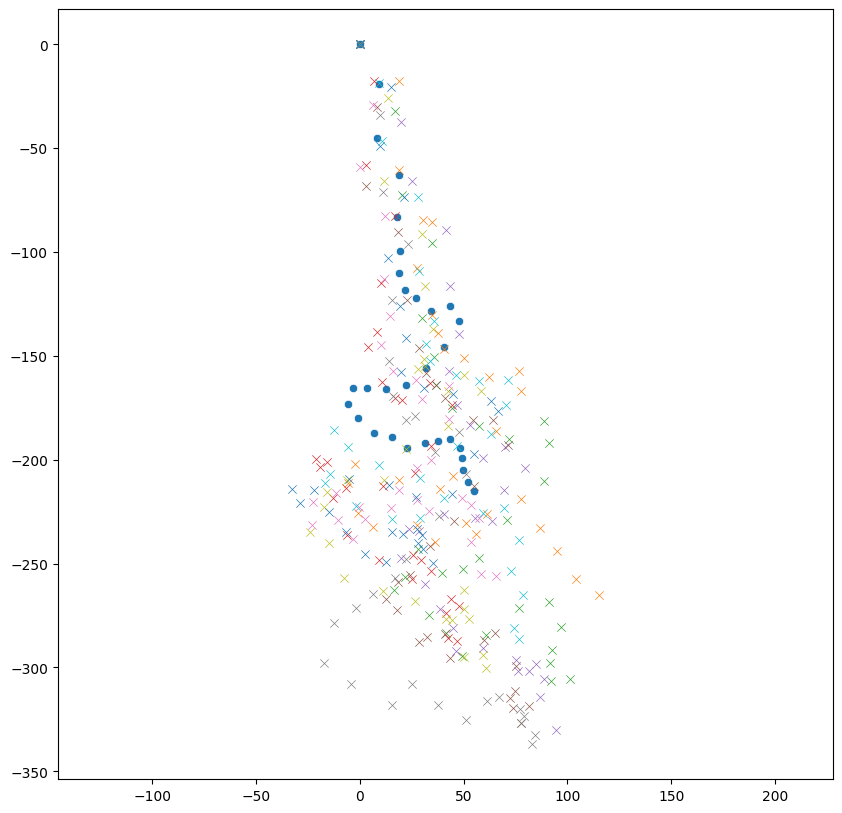

In [88]:
_, ax = plt.subplots(figsize=(10,10))
plt.axis('equal')

n = len(rc[0]['x'])
w = rc[0]['weapon']
wrpm = rpm(w)
magic = multiplier(w)

x, y = mean_recoil(rc)
sns.scatterplot(ax=ax, x=x, y=y)

for r in rc:
    sns.scatterplot(ax=ax, x=r['x'], y=r['y'], marker='x')

t = [int(i * 60.0 * 1000 / wrpm) for i in range(n)]

s = json.dumps({
    'x': x,
    'y': y,
    'time_points': t,
    })
print(s.replace('], ','],\n')[1:-1] + ',')
print(n, len(x), len(y), len(t))

In [89]:
if len(rc) > 2:
  for i in range(len(rc)):
    sub = rc[:i] + rc[i+1:]
    tx, ty = mean_abs_recoil(sub)
    print('w/o', i, ':', np.mean([rc_score(r, {'x': tx, 'y': ty}) for r in sub]))
else:
  print('not enough patterns')
# tx, ty = mean_delta_recoil(rc)
# print('mean_delta_recoil', np.mean([rc_score(r, {'x': tx, 'y': ty}) for r in rc]))
# tx, ty = median_delta_recoil(rc)
# print('median_delta_recoil', np.mean([rc_score(r, {'x': tx, 'y': ty}) for r in rc]))
# tx, ty = mean_delta2_recoil(rc)
# print('mean_delta2_recoil', np.mean([rc_score(r, {'x': tx, 'y': ty}) for r in rc]))

w/o 0 : 76.29936788839451
w/o 1 : 76.61179502484606
w/o 2 : 75.28393502855445
w/o 3 : 76.44765790031157
w/o 4 : 76.28830283987953
w/o 5 : 75.92342073959618
w/o 6 : 78.37774886134414
w/o 7 : 74.14902028179473
w/o 8 : 75.28205802105167
w/o 9 : 76.11468371770111


0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73


(0.9214023304810413,
 False,
 [72.85203629223777,
  73.21199802178187,
  81.10565278963901,
  74.22552930314487,
  76.2513810902986,
  76.59673800615211,
  57.80636425730111,
  91.09864059973573,
  80.59281128324261,
  74.19502837889051],
 'err',
 [23591839.190000035,
  22586885.669999987,
  22485575.289999966,
  22012471.13999998,
  21863496.440000013,
  21574435.630000014,
  21852257.95000001,
  21737575.609999992,
  21635302.220000003])

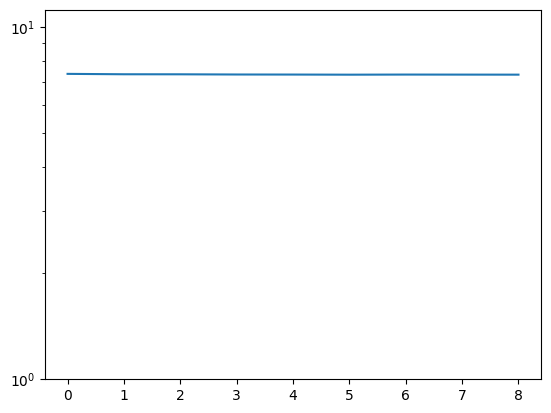

In [90]:
k = len(rc) - 1
err = [0] * k
# maxerr = [0] * len(rc)
# minerr = [100000000] * len(rc)
tx, ty = mean_abs_recoil(rc)
for i in range(200):
    t = np.random.permutation(rc)
    for j in range(k):
        x, y = mean_recoil(t[:j+1])
        d = diff(x, tx) + diff(y, ty)
        err[j] += d
        # minerr[j] = min(minerr[j], d)
        # maxerr[j] = max(maxerr[j], d)

bd = 0
bi = 0
for i, r in enumerate(rc):
    print(i, r['comment'], rc_score(r, {'x': tx, 'y': ty}))
    d = diff(r['x'][:n], tx) + diff(r['y'][:n], ty)
    if d > bd:
        bd = d
        bi = i
print('bad', bi, rc[bi]['comment'])
plt.yscale('log')
plt.ylim(1, None)
sns.lineplot(x=range(k), y=err)
d = err[-2] / err[0]
d, d < 0.01, [rc_score(r, {'x': tx, 'y': ty}) for r in rc], 'err', err